In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---------------------

In [203]:
recup = pd.read_csv('./curados/para_reg.csv')

In [4]:
recup.shape

(756, 20)

In [204]:
# dropeo todo o que tiene null (solo me quedo con lo robado y recuperado en este período.)
recup = recup.dropna()

In [10]:
recup.shape

(824, 20)

In [5]:
recup.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_modelo_descripcion', 'automotor_uso_descripcion',
       'titular_tipo_persona', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'fecha_recup', 'dias'],
      dtype='object')

In [205]:
def daysonly(dias):
    return int(dias.split(' ')[0])

In [206]:
# genero una nueva columna donde el dato es solo la cantidad de dias como int
recup['dias_'] = recup['dias'].apply(daysonly)

In [9]:
recup.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,...,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,fecha_recup,dias,dias_
0,DENUNCIA DE ROBO O HURTO,2018-01-11,1988-09-06,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,1988.0,FURGON,FORD,F-100,...,Física,LUIS GUILLON,BUENOS AIRES,Masculino,1988.0,ARGENTINA,1.0,2019-01-29,383 days 00:00:00.000000000,383
1,DENUNCIA DE ROBO O HURTO,2018-01-31,2017-03-31,LANUS Nº 1,Buenos Aires,Nacional,2017.0,SEDAN 4 P,FIAT,PALIO,...,Física,LANUS,BUENOS AIRES,Masculino,1986.0,ARGENTINA,1.0,2018-09-25,237 days 00:00:00.000000000,237
2,DENUNCIA DE ROBO O HURTO,2018-01-11,1999-07-29,QUILMES Nº 1,Buenos Aires,Nacional,1999.0,SEDAN 3 P,FIAT,PALIO,...,Física,BERNAL,BUENOS AIRES,Masculino,1996.0,ARGENTINA,1.0,2018-04-03,82 days 00:00:00.000000000,82
3,DENUNCIA DE ROBO O HURTO,2018-01-30,2017-12-07,BERAZATEGUI Nº 1,Buenos Aires,Nacional,2017.0,SEDAN 4 P,PEUGEOT,308,...,Física,BERAZATEGUI,BUENOS AIRES,Femenino,1968.0,ARGENTINA,1.0,2018-06-25,146 days 00:00:00.000000000,146
4,DENUNCIA DE ROBO O HURTO,2018-01-02,2012-05-03,SAN ISIDRO Nº 02,Buenos Aires,Importado,2012.0,SEDAN 4 P,AUDI,A3,...,Física,BECCAR,BUENOS AIRES,Femenino,1967.0,ARGENTINA,1.0,2018-02-08,37 days 00:00:00.000000000,37


(0, 600)

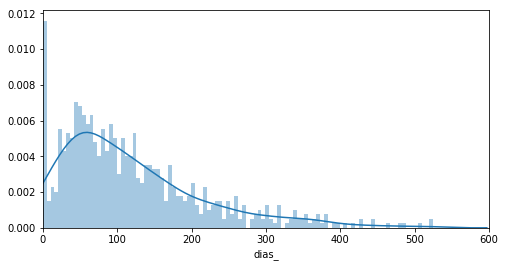

In [63]:
plt.figure(figsize= (8,4))
sns.distplot(recup.dias_, bins= 100)
plt.xlim(0,600)

In [11]:
recup.dias_.describe()

count    756.000000
mean     120.099206
std       97.520503
min        0.000000
25%       49.000000
50%       96.500000
75%      164.000000
max      525.000000
Name: dias_, dtype: float64

-------------------------------------------

# Voy a hacer una regresión para ver si puedo predecir días hasta recupero

## limpio features y feature engineering

In [13]:
recup.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_modelo_descripcion', 'automotor_uso_descripcion',
       'titular_tipo_persona', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'fecha_recup', 'dias', 'dias_'],
      dtype='object')

In [207]:
recup.drop(['tramite_tipo', 'registro_seccional_descripcion', 'titular_domicilio_localidad',
            'dias', 'fecha_recup'], axis= 1, inplace = True)

In [16]:
recup.columns

Index(['tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_marca_descripcion', 'automotor_modelo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dias_'],
      dtype='object')

In [17]:
# sacar de fecha de tramite (denuncia robo), mes y día de la semana, dia del año. 
# sacar de fecha_inscripción_inicial (patentamiento), año
# tirar titulpar_domicilio_provincia pero hacer columna que sea si está radicado en prov de domicilio

In [208]:
recup['tramite_fecha'] = pd.to_datetime(recup['tramite_fecha'])
recup['fecha_inscripcion_inicial'] = pd.to_datetime(recup['fecha_inscripcion_inicial'])


In [209]:
recup['dia_robo'] = recup['tramite_fecha'].apply(lambda x: int(x.isoweekday())) #lunes es 1, domingo 7
recup['mes_robo'] = recup['tramite_fecha'].apply(lambda x: int(x.month))
recup['dia_del_anio'] = recup['tramite_fecha'].apply(lambda x: int(x.timetuple().tm_yday))
recup['anio_pat'] = recup['fecha_inscripcion_inicial'].apply(lambda x: int(x.year))

In [210]:
#recup['tit_radicado'] = 
recup['tit_radicado'] = (recup['registro_seccional_provincia'] == recup['titular_domicilio_provincia']).astype(int)
recup['automotor_anio_modelo'] = recup['automotor_anio_modelo'].astype(int)
recup['titular_anio_nacimiento'] = recup['titular_anio_nacimiento'].astype(int)


In [211]:
recup.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [69]:
recup.head(1)

,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,dias_,dia_robo,mes_robo,dia_del_anio,anio_pat,tit_radicado
0,Buenos Aires,Nacional,1988,FURGON,FORD,F-100,Privado,Física,Masculino,1988,ARGENTINA,1.0,383,4,1,11,1988,0


### separo variable a predecir de X

In [66]:
#y = recup.dias_

In [72]:
#X = recup[['tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'fecha_recup']]

In [71]:
recup.columns

Index(['registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_marca_descripcion', 'automotor_modelo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dias_', 'dia_robo', 'mes_robo', 'dia_del_anio', 'anio_pat',
       'tit_radicado'],
      dtype='object')

In [212]:
prov_dummie= pd.get_dummies(recup.registro_seccional_provincia)
origen_dummie= pd.get_dummies(recup.automotor_origen)
tipo_dummie= pd.get_dummies(recup.automotor_tipo_descripcion)
#marca_dummie= pd.get_dummies(recup.automotor_marca_descripcion)
modelo_dummie= pd.get_dummies(recup.automotor_modelo_descripcion)
uso_dummie= pd.get_dummies(recup.automotor_uso_descripcion)
pais_tit_dummie = pd.get_dummies(recup.titular_pais_nacimiento)
# MARCA NO LA NECESITAMOS, CON MODELO YA TENÉS MARCA

In [213]:
recup['titular_pers_fisica'] = np.where(recup['titular_tipo_persona'] == 'Física', 1, 0)

In [214]:
recup['titular_masculino'] = np.where(recup['titular_genero'] == 'Masculino', 1, 0)

In [215]:
recup = recup.join([prov_dummie, origen_dummie, tipo_dummie,  modelo_dummie, uso_dummie, pais_tit_dummie]) #marca_dummie,

In [216]:
recup.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion','automotor_tipo_descripcion',
        'automotor_marca_descripcion', 'automotor_modelo_descripcion','titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [218]:
y = recup.dias_

In [225]:
#X = recup.drop('dias_', axis= 1)
# saco todo lo que viene de fecha salvo dia de la semana
X = recup.drop('dias_', axis = 1)

In [137]:
recup['titular_pers_fisica'].sum()

756

In [143]:
#recup.corr()
#plt.matshow(recup.corrwith(y))
recup['titular_pers_fisica'].corr(y) # NO TIENE CORRELACION, VUELA
recup['tit_radicado'].corr(y) # NO TIENE CORRELACION, VUELA

nan

In [159]:
recup[['automotor_anio_modelo','unico_duenio', 'dias_', 'dia_robo', 'mes_robo', 'dia_del_anio',
       'titular_pers_fisica', 'titular_masculino', 'titular_anio_nacimiento', 'anio_pat', 'tit_radicado']].corr()

,automotor_anio_modelo,unico_duenio,dias_,dia_robo,mes_robo,dia_del_anio,titular_pers_fisica,titular_masculino,titular_anio_nacimiento,anio_pat,tit_radicado
automotor_anio_modelo,1.000000,-0.031519,-0.022931,-0.045278,0.069944,0.067551,NaN,0.056141,-0.067471,0.999795,NaN
unico_duenio,-0.031519,1.000000,0.033787,0.006832,-0.006608,-0.007534,NaN,0.008488,0.107970,-0.031377,NaN
dias_,-0.022931,0.033787,1.000000,0.027481,-0.016532,-0.019052,NaN,0.055440,0.034559,-0.022560,NaN
dia_robo,-0.045278,0.006832,0.027481,1.000000,0.030696,0.027974,NaN,-0.025073,-0.042030,-0.044478,NaN
mes_robo,0.069944,-0.006608,-0.016532,0.030696,1.000000,0.995806,NaN,0.038847,0.007432,0.069169,NaN
dia_del_anio,0.067551,-0.007534,-0.019052,0.027974,0.995806,1.000000,NaN,0.042712,0.011977,0.066713,NaN
titular_pers_fisica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
titular_masculino,0.056141,0.008488,0.055440,-0.025073,0.038847,0.042712,NaN,1.000000,0.029498,0.055861,NaN
titular_anio_nacimiento,-0.067471,0.107970,0.034559,-0.042030,0.007432,0.011977,NaN,0.029498,1.000000,-0.068330,NaN
anio_pat,0.999795,-0.031377,-0.022560,-0.044478,0.069169,0.066713,NaN,0.055861,-0.068330,1.000000,NaN


In [226]:
X.drop(['titular_pers_fisica', 'tit_radicado'], axis=1, inplace= True)

In [227]:
X.shape

(756, 133)

In [81]:
X.columns

Index(['automotor_anio_modelo', 'titular_anio_nacimiento', 'unico_duenio',
       'dia_robo', 'mes_robo', 'dia_del_anio', 'anio_pat', 'tit_radicado',
       'titular_pers_fisica', 'titular_masculino',
       ...
       'ARGENTINA', 'BOLIVIA', 'CHILE', 'COREA REPUBLICANA', 'ESPANA',
       'ITALIA', 'PARAGUAY', 'PERU', 'URUGUAY', 'VENEZUELA'],
      dtype='object', length=151)

## Feature selection?

----------------

# Importo librerias de regresión

In [89]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

## Hago cosita

In [228]:
# Train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [229]:
# Escalo con el Xtrain
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain_scal = scaler.transform(Xtrain)  
Xtest_scal = scaler.transform(Xtest)  

In [230]:
#linear regression
lr = LinearRegression()

In [231]:
lr.fit(Xtrain_scal, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
ypred = lr.predict(Xtest_scal)

In [233]:
np.sqrt(mean_squared_error(ytest, ypred))

3827604940368590.0

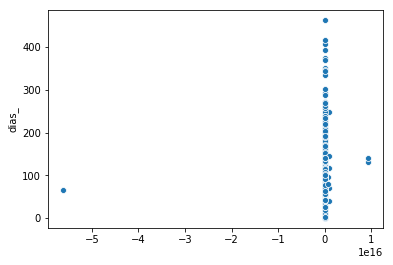

In [234]:
sns.scatterplot(ypred, ytest)

In [235]:
# KNN
neigh = KNeighborsRegressor(weights = "distance")

In [236]:
parameters_k = np.arange(1,50,1)


In [237]:
parameters_knn = [{'n_neighbors': parameters_k}]

In [238]:
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv= 10, verbose=True)

In [239]:
regresor_neigh.fit(Xtrain_scal, ytrain)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:    8.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [240]:
regresor_neigh.best_params_

{'n_neighbors': 41}

In [241]:
regresor_neigh.best_score_

-0.019778301535125546

In [242]:
ypred2 = regresor_neigh.predict(Xtest_scal)


In [243]:
np.sqrt(mean_squared_error(ytest, ypred2))

88.8520122156285

(0, 500)

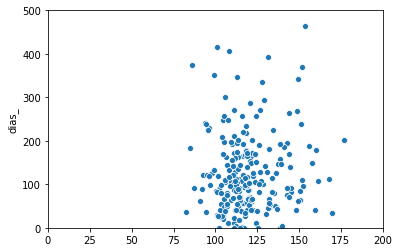

In [244]:
sns.scatterplot(ypred2, ytest)
plt.xlim(0,200)
plt.ylim(0, 500)

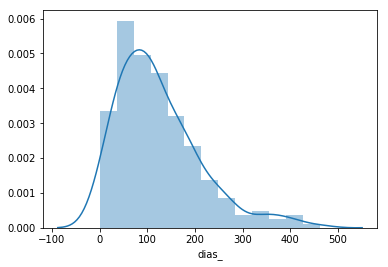

In [201]:
sns.distplot(ytest)

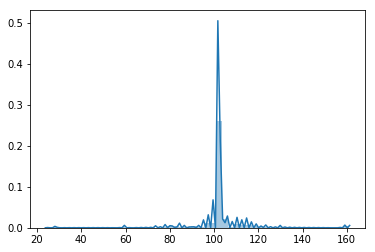

In [245]:
sns.distplot(ypred3)

In [246]:
# SVR
svreg = SVR()

In [247]:
parameters_svr = [{'kernel':['rbf', 'linear'] , 'C': [1,10,100],'gamma': [0.1,0.5, 0.01] }]

In [248]:
regresor_svr = GridSearchCV(svreg, parameters_svr, cv= 5, verbose=True)

In [249]:
regresor_svr.fit(Xtrain_scal, ytrain)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   27.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.1, 0.5, 0.01],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [250]:
regresor_svr.best_params_

{'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}

In [251]:
regresor_svr.best_score_

-0.03594436308410482

In [252]:
ypred3 = regresor_svr.predict(Xtest_scal)


In [253]:
np.sqrt(mean_squared_error(ytest, ypred3))

91.19114703460623

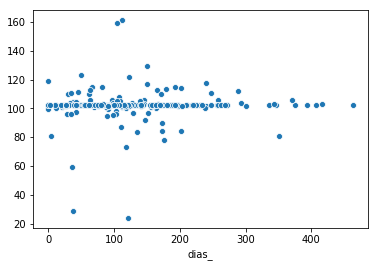

In [254]:
sns.scatterplot(ytest, ypred3)

In [255]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(Xtrain_scal, ytrain)

In [256]:
y_clf = clf.predict(Xtest_scal)

In [257]:
np.sqrt(mean_squared_error(ytest, y_clf))

131.73247486447943

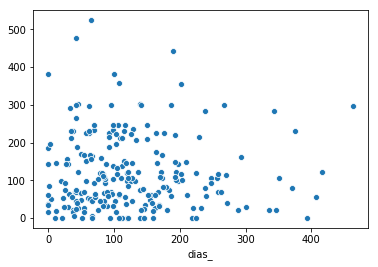

In [258]:
sns.scatterplot(ytest, y_clf)

In [262]:
#depths = np.arange(1, 21)
#num_leafs = [1, 5, 10, 20, 50, 100]
#param_grid = [{'max_depth':depths,
#              'min_samples_leaf':num_leafs}]

In [270]:
gst = GridSearchCV(estimator=clf, param_grid={'min_samples_split': range(2, 10)}, cv=10) #scoring=rmse_scorer

In [271]:
gst.fit(Xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [272]:
gst.best_params_

{'min_samples_split': 9}

In [273]:
y_gst = gst.predict(Xtest_scal)

In [274]:
np.sqrt(mean_squared_error(ytest, y_gst))

118.68018769767411

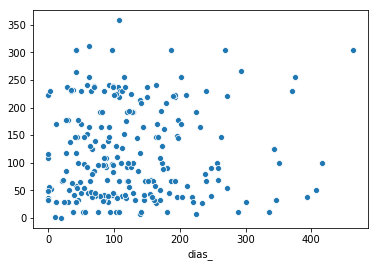

In [275]:
sns.scatterplot(ytest, y_gst) # TODO MAL